# Advance House Prices Regression
#### Data Source: Kaggle

#### Summary:
Suppose you want to buy a new house, what are the factors that you will consider. My top factors would be the Number of Rooms, Number of Bathrooms, Street Access, whether it has a Garage. But if the house has a each of these features, it would be quite expensive. 

So eventually the house you buy has to be a balance between the features you want, and the price you are willing to pay. The dataset we have explains the price of 1500 such house with all the features they have, so that you can analyze the features and their effect they have on the price. 

For a buyer you can estimate the price you should be paying for a property, and for a seller you can estimate a quoting price for a property.


#### Objective:
To predict house prices based on 79 explanatory variables. 

#### DataSet:
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

#### Procedure:
1. Data exploration for missing values, outliers
2. A thorough data cleaning exercise based on business understanding
3. Feature engineer to create intuitive new features
4. One hot encoding to convert categorical features to encoded columns containing zeroes and one's
5. Training test split
6. Trying basic models- first pass
7. 37 skewed numerical features to Box Cox transform, to improve accuracy
8. Testing a custom stacked regression model, which aggregates the prediction from various models

### 1. Importing Important Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

### 2. Reading the datasets

In [2]:
# Reading test and train data
df_train = pd.read_csv("train.csv",header = 0, index_col= 0)
df_test = pd.read_csv("test.csv",header = 0, index_col= 0)

print("Train data has:",df_train.shape[0], "rows and",df_train.shape[1], "columns")
print("Test data has:",df_test.shape[0], "rows and",df_test.shape[1], "columns")

Train data has: 1460 rows and 80 columns
Test data has: 1459 rows and 79 columns


In [3]:
# A compiled dataset for both X and Y features can help us create a function which can be cleaned
df_train1 = df_train.drop("SalePrice", axis = 1)
df = df_train1.append(df_test)

In [4]:
df.shape

(2919, 79)

### 3. Checking data frame summary

In [5]:
# All the integer datatypes
df_train.select_dtypes("int64").columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
# All the float datatypes
df_train.select_dtypes("float64").columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [7]:
# All the string datatypes
df_train.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
# Statistical summary of all the columns with int/float values
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking the correlations

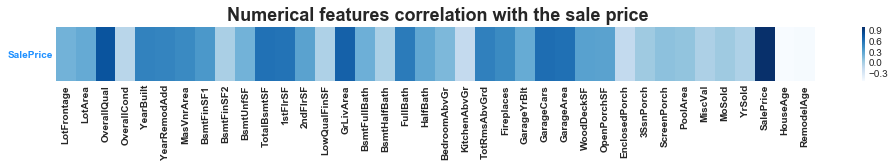

In [53]:
num=df_train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

### 4. Missing value treatment

In [9]:
# Checking which columns have missing values
df1 = df[df.columns[df.isnull().sum()>0]]
len(df1.index)-df1.count()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [10]:
# Creating a cleaining function to clean the various columns based on different logics
def cleantable(df):
    # Masonry vaneer is a type of front wall add, and NA means absense, so making type as None and area as 0
    df['MasVnrType'].fillna("None", inplace = True)
    df['MasVnrArea'].fillna(0, inplace = True)
    # Garage related Nas are due to absense of Garage so converting to None for text and 0 for numeric
    df['GarageType'].fillna("None", inplace = True)
    df['GarageYrBlt'].fillna(0, inplace = True)
    df['GarageFinish'].fillna("None", inplace = True)
    df['GarageQual'].fillna("None", inplace = True)
    df['GarageCond'].fillna("None", inplace = True)
    df['GarageArea'].fillna(0, inplace = True)
    df['GarageCars'].fillna(0, inplace = True)
    # Basement Variables
    df['BsmtQual'].fillna("None", inplace = True)
    df['BsmtCond'].fillna("None", inplace = True)
    df['BsmtFinType1'].fillna("None", inplace = True)
    df['BsmtExposure'].fillna("No", inplace = True)
    df['BsmtFinType2'].fillna("Unf", inplace = True)
    df['BsmtFinSF1'].fillna(0, inplace = True)
    df['BsmtFinSF2'].fillna(0, inplace = True)
    df['BsmtHalfBath'].fillna(0, inplace = True)
    df['BsmtFullBath'].fillna(0, inplace = True)
    df['TotalBsmtSF'].fillna(0, inplace = True)
    df['BsmtUnfSF'].fillna(0, inplace = True)
    # Remaininig substituting with mode
    df['Exterior1st'].fillna('VinylSd', inplace = True)
    df['Exterior2nd'].fillna('VinylSd', inplace = True)
    df['Utilities'].fillna('AllPub', inplace = True)
    df['KitchenQual'].fillna('TA', inplace = True)
    df['MSZoning'].fillna('RL', inplace = True)
    df['PoolQC'].fillna("NoPool", inplace = True)
    df['MiscFeature'].fillna("None", inplace = True)
    df['Electrical'].fillna("SBrkr", inplace = True)
    df['Alley'].fillna("None", inplace = True)
    df['LotFrontage'].fillna(0, inplace = True)
    df['FireplaceQu'].fillna("None", inplace = True)
    df['Functional'].fillna('Typ', inplace = True)
    df['SaleType'].fillna('WD', inplace = True)
    df['Fence'].fillna("None", inplace = True)
    return(df)

In [11]:
# Cleaning train/test data based on function defined above
df_train_cleaned = cleantable(df_train)
df_test_cleaned = cleantable(df_test)

### 5. Feature Engineering
Year Sold - Year built = Construction Age at time of selling

Year Sold - Year remodel = Remodel age at the age of selling

In [12]:
# We are adding the above mentioned two columns

df_train_cleaned['HouseAge'] = df_train_cleaned['YrSold'] - df_train_cleaned['YearBuilt']
df_train_cleaned['RemodelAge'] = np.maximum((df_train_cleaned['YrSold'] - df_train_cleaned['YearRemodAdd']),0)

df_test_cleaned['HouseAge'] = df_test_cleaned['YrSold'] - df_test_cleaned['YearBuilt']
df_test_cleaned['RemodelAge'] = np.maximum(df_test_cleaned['YrSold'] - df_test_cleaned['YearRemodAdd'],0)


In [13]:
# Converting the MSSubClass column to string
df_train_cleaned['MSSubClass']= df_train_cleaned['MSSubClass'].astype(str)
df_test_cleaned['MSSubClass']= df_test_cleaned['MSSubClass'].astype(str)

In [14]:
# Checking the shape of data again
print("Train data has:",df_train_cleaned.shape[0], "rows and",df_train_cleaned.shape[1], "columns")
print("Test data has:",df_test_cleaned.shape[0], "rows and",df_test_cleaned.shape[1], "columns")

#df_train_cleaned.columns

Train data has: 1460 rows and 82 columns
Test data has: 1459 rows and 81 columns


### 6.One hot encoding for the entire dataset's categorical columns using pd.get_dummies

In [16]:
# Y Train
y_train = df_train_cleaned.SalePrice

y_train_final = y_train

In [17]:
df_train_cleaned = df_train_cleaned.drop('SalePrice',axis =1)

In [18]:
df = df_train_cleaned.append(df_test_cleaned)

In [19]:
df.shape

(2919, 81)

In [20]:
# the one hot encoding function 
from sklearn.base import TransformerMixin
class DataFrameEncoder(TransformerMixin):

    def __init__(self):
        """Encode the data.

        Columns of data type object are appended in the list. After 
        appending Each Column of type object are taken dummies and 
        successively removed and two Dataframes are concated again.

        """
    def fit(self, X, y=None):
        self.object_col = []
        for col in X.columns:
            if(X[col].dtype == np.dtype('O')):
                self.object_col.append(col)
        return self

    def transform(self, X, y=None):
        dummy_df = pd.get_dummies(X[self.object_col],drop_first=True)
        X = X.drop(X[self.object_col],axis=1)
        X = pd.concat([dummy_df,X],axis=1)
        return X

In [21]:
df2 = DataFrameEncoder().fit_transform(df)
df2.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,RemodelAge
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,5,5
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,2007,31,31
3,0,0,0,0,0,0,0,0,0,1,...,42,0,0,0,0,0,9,2008,7,6
4,0,0,0,0,0,0,0,0,0,0,...,35,272,0,0,0,0,2,2006,91,36
5,0,0,0,0,0,0,0,0,0,1,...,84,0,0,0,0,0,12,2008,8,8


## Checkpoint 1

In [151]:
# Splitting the data back into test and train

In [24]:
X_train_final = df2[0:1460] 
X_test = df2[1460:]
print(X_train_final.shape)
print(X_test.shape)
print(y_train_final.shape)

(1460, 273)
(1459, 273)
(1460,)


### 7. Trying various models 

In [26]:
# Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_final, y_train_final,test_size  = 0.33, random_state = 0)

#### Model 1: Random Forest

In [28]:
# Creating the first model: Random forest

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

forest.fit(X_train,Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)



from sklearn.metrics import mean_squared_error

#mean_squared_error(Y_train, y_train_pred)

#Checking the test metric for accuracy as defined by Kaggle
import math
math.sqrt(mean_squared_error(np.log(Y_test), np.log(y_test_pred)))
#math.sqrt(mean_squared_error(Y_test, y_test_pred)) # for log y

0.13502705944023644

#### Model 2: Gradient Boosting from sklearn

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 430,
                              max_depth =4 ,
                              random_state = 1,
                              learning_rate = 0.03)

gb.fit(X_train,Y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)



from sklearn.metrics import mean_squared_error

#mean_squared_error(Y_train, y_train_pred)

#Checking the test metric for accuracy as defined by Kaggle
import math
math.sqrt(mean_squared_error(np.log(Y_test), np.log(y_test_pred)))

#math.sqrt(mean_squared_error(Y_test, y_test_pred))

0.1270228133658703

#### Model 3 with XGBoost

In [30]:
import xgboost as xgb

In [38]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.02, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=800,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =4, nthread = -1)

#fit model
model_xgb.fit(X_train,Y_train)
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)


from sklearn.metrics import mean_squared_error

#mean_squared_error(Y_test, y_test_pred)

#Checking the test metric for accuracy as defined by Kaggle
import math
math.sqrt(mean_squared_error(np.log(Y_test), np.log(y_test_pred)))

#math.sqrt(mean_squared_error(Y_test, y_test_pred))

0.11841177805148058

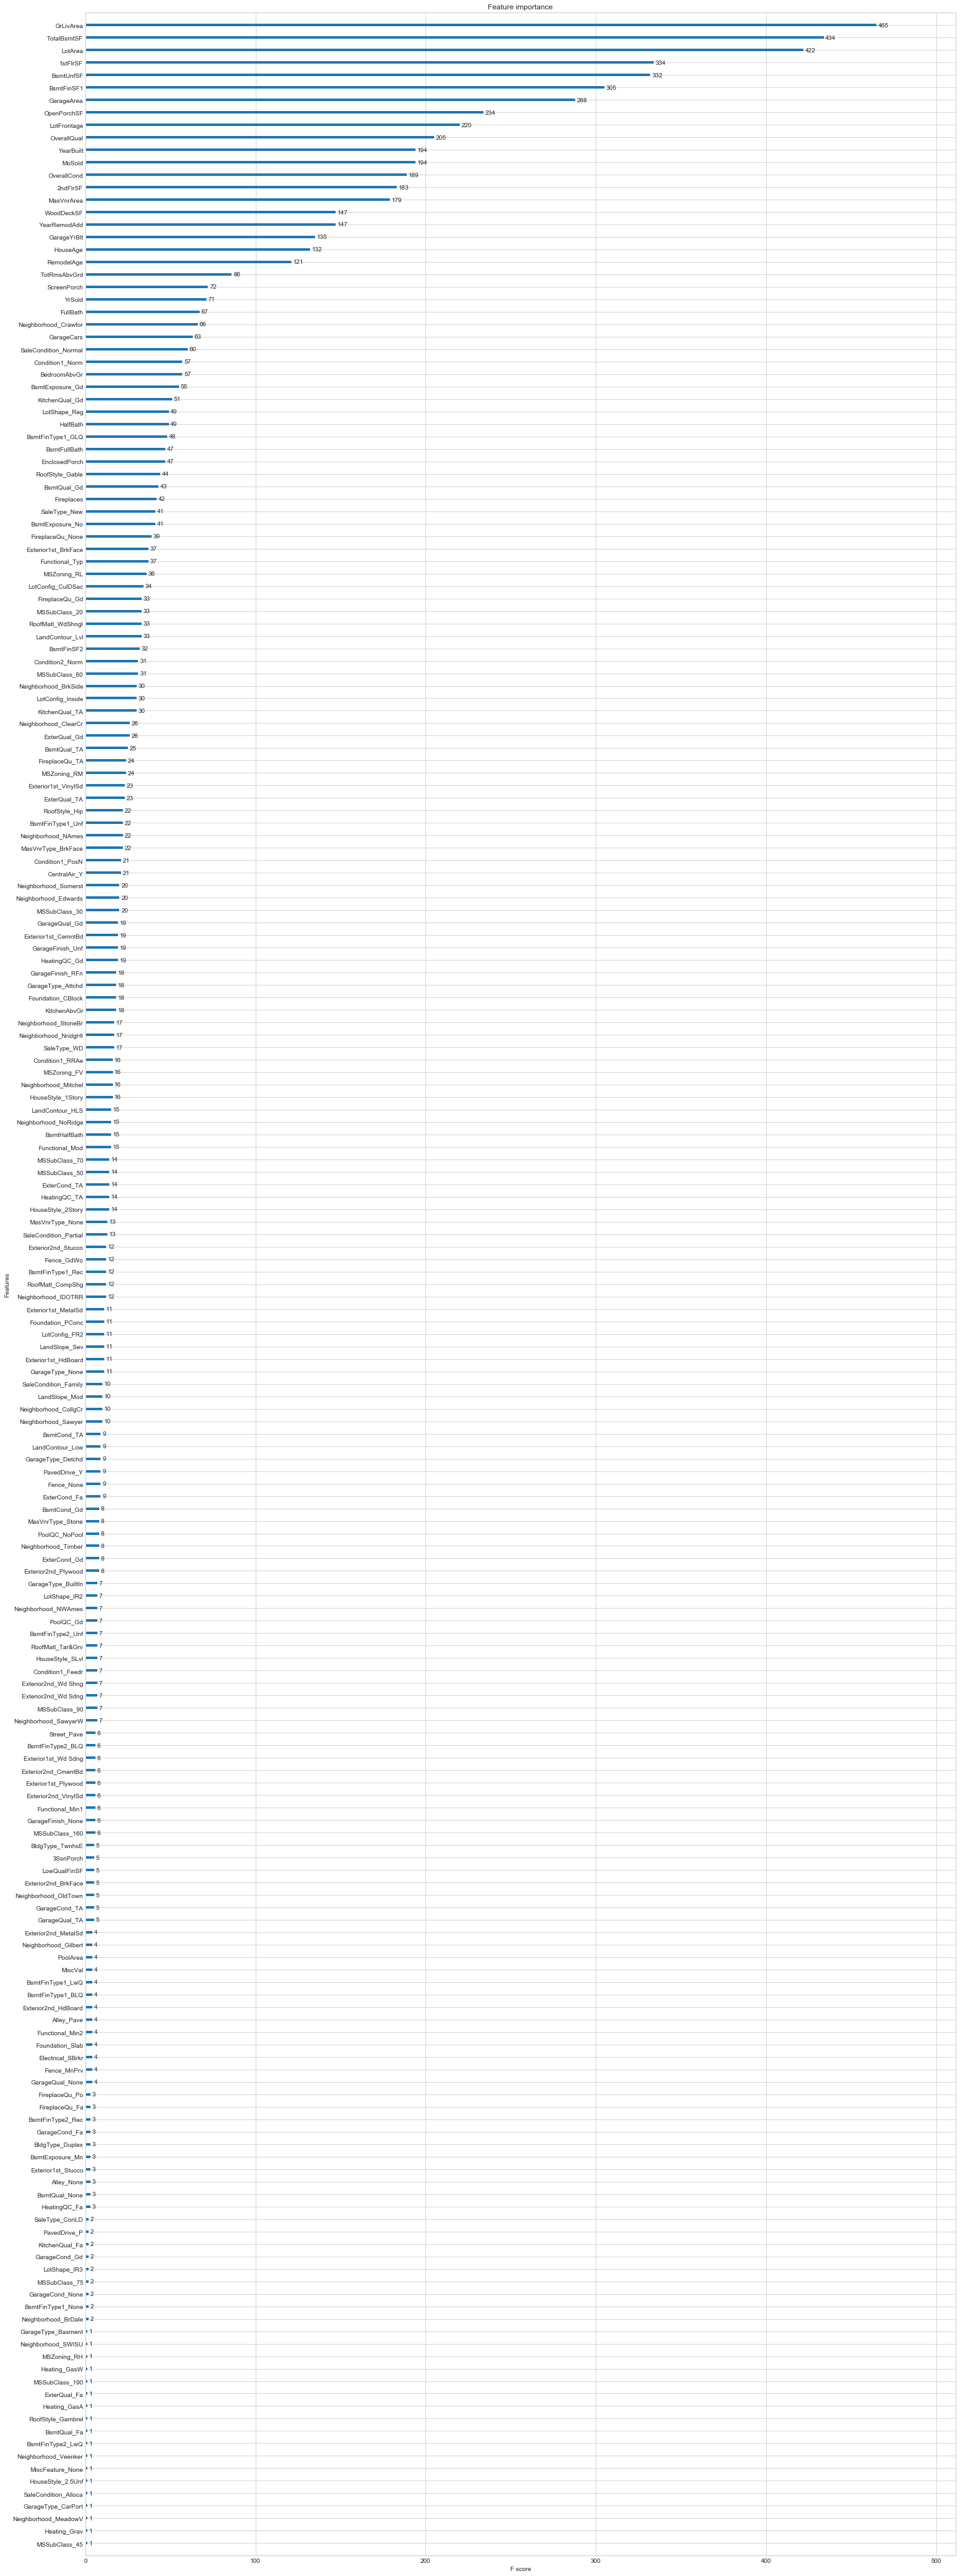

In [47]:
importances = model_xgb.get_booster().get_score(importance_type= 'gain')

from xgboost import plot_importance

plot_importance(model_xgb)

plt.gcf().set_size_inches(25,75)




### The model shows that the features which play an important role in deciding the price of a property

The most important features are
1. The above ground living area of the property
2. The surface area of the basement
3. Area of the entire lot
4. Surface area of the first floor
5. Basement area
6. Garage area


#### Normalizing the features

In [32]:
# Trying to improve the model
numeric_feats = df.dtypes[df.dtypes != "object"].index
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'HouseAge', 'RemodelAge'],
      dtype='object')

In [33]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [34]:
# Check the skew of all numerical features
skewed_feats = df2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [35]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 37 skewed numerical features to Box Cox transform


In [36]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df2[feat] += 1
    df2[feat] = boxcox1p(df2[feat], lam)
    
    
# Running from checkpoint 1 again

## marginal improvement


In [284]:
#### Normalizing the sale price variable

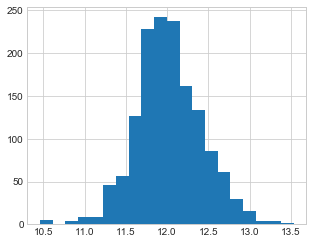

In [37]:
y_train_final_log = np.log(y_train_final)

plt.style.use('seaborn-whitegrid')
y_train_final_log.hist(bins = 20, figsize = (5,4))
plt.show()

# Going to checkpoint 1
# No improvement 

## Stacked regression technique

# Hola stacked regression

### Final Datasets 
X_train_final

X_test_final

y_train_final_log



In [50]:
# Importing test predictions just in case

#y_test = pd.read_csv("full-score.csv")
#y_test.head()
#X_train_final.shape

X_train_final.to_csv("xtrain.csv", header = True)
X_test.to_csv("xtest1.csv")
y_train_final.to_csv("ytrain.csv", header = True)

In [48]:
X_test.shape
# Basic aggregator function: Defining 6 basic models, whose predictions are evvaluated

(1459, 273)

In [66]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [77]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train_final.values)
    rmse= np.sqrt(-cross_val_score(model, X_train_final.values, y_train_final_log, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [84]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [89]:
# Base model scores
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("XG Boosting: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("Light G Boosting M: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.1275 (0.0137)

ElasticNet score: 0.1277 (0.0137)

Kernel Ridge score: 0.1279 (0.0148)

Gradient Boosting: 0.1242 (0.0136)

Gradient Boosting: 0.1259 (0.0101)

Gradient Boosting: 0.1243 (0.0091)



In [105]:
# Averaging the models

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [117]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1200 (0.0113)

